In [1]:
import zipfile
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


zip_path = Path("data/archive.zip")
file_path = Path("data/alzheimers_prediction_dataset.csv")
with zipfile.ZipFile(zip_path) as zf:
    zf.extractall(path=file_path)
zf.close()

alzheimers = pd.read_csv("data/alzheimers_prediction_dataset.csv/alzheimers_prediction_dataset.csv")
alzheimers.head()


,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [2]:
alzheimers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [3]:
for element in alzheimers.columns:
    print(alzheimers[element].describe())
    print("//////////////////////////////")


count      74283
unique        20
top       Brazil
freq        3839
Name: Country, dtype: object
//////////////////////////////
count    74283.000000
mean        71.964703
std         12.980748
min         50.000000
25%         61.000000
50%         72.000000
75%         83.000000
max         94.000000
Name: Age, dtype: float64
//////////////////////////////
count      74283
unique         2
top       Female
freq       37249
Name: Gender, dtype: object
//////////////////////////////
count    74283.000000
mean         9.487514
std          5.757020
min          0.000000
25%          4.000000
50%          9.000000
75%         14.000000
max         19.000000
Name: Education Level, dtype: float64
//////////////////////////////
count    74283.000000
mean        26.780639
std          4.764679
min         18.500000
25%         22.700000
50%         26.800000
75%         30.900000
max         35.000000
Name: BMI, dtype: float64
//////////////////////////////
count     74283
unique        3
to

In [4]:
import matplotlib.pyplot as plt
def save_fig(id,extension="png",tight_layout=True,resolution=300):
    catalog_path = Path("data/charts")
    if not catalog_path.is_file():
        catalog_path.mkdir(parents=True, exist_ok=True)
    if tight_layout:
        plt.tight_layout()
    chart_path = catalog_path / f"{id}.{extension}"
    plt.savefig(chart_path,format=extension,dpi=resolution)



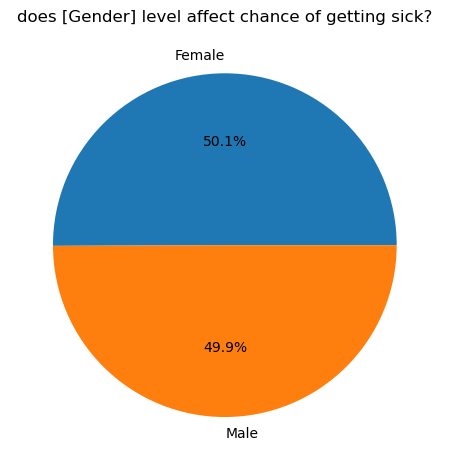

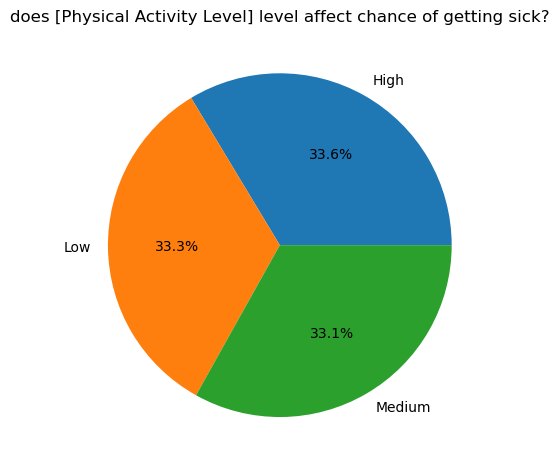

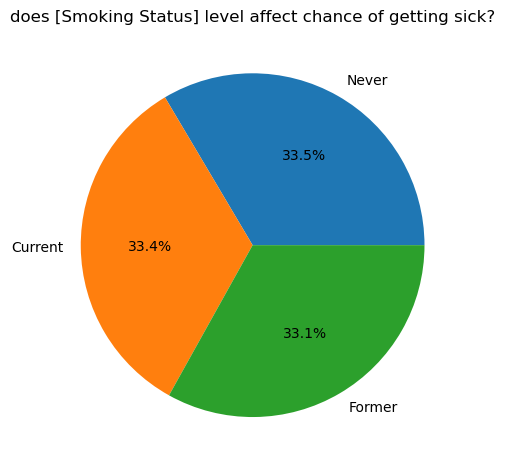

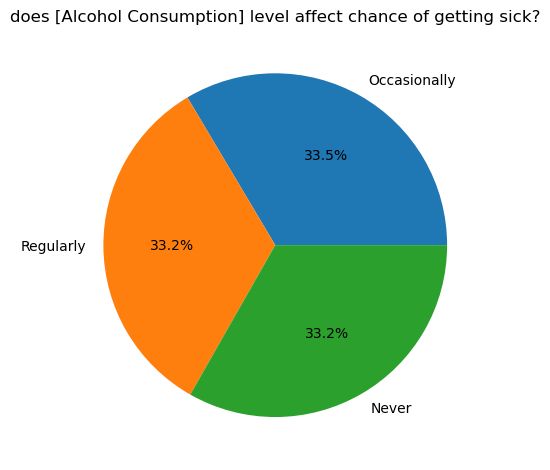

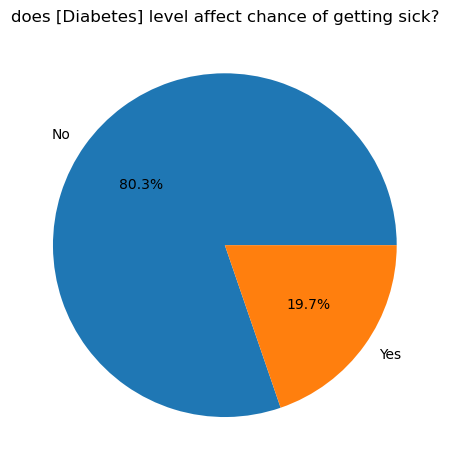

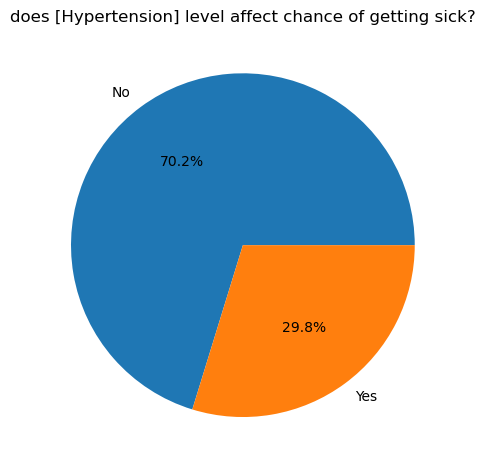

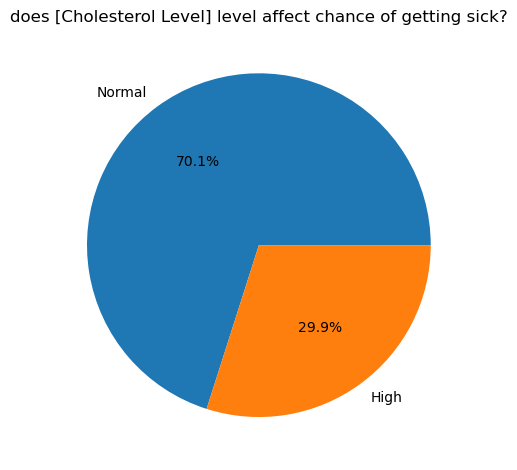

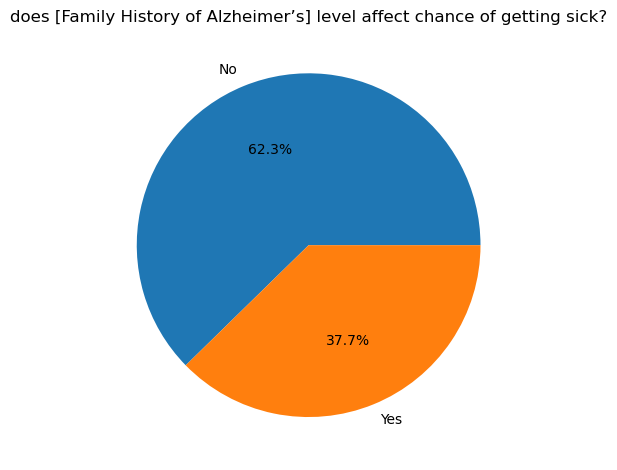

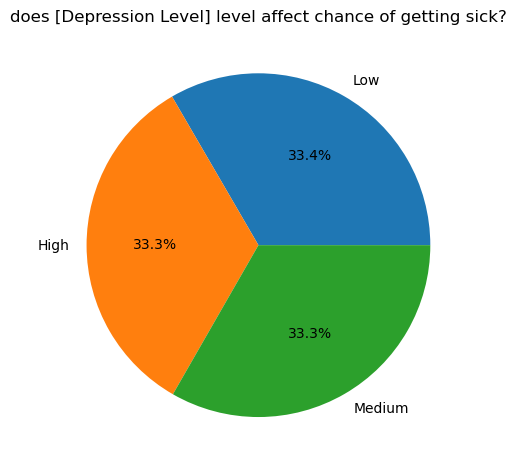

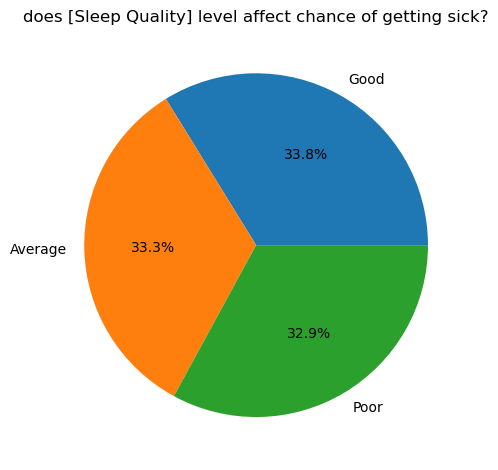

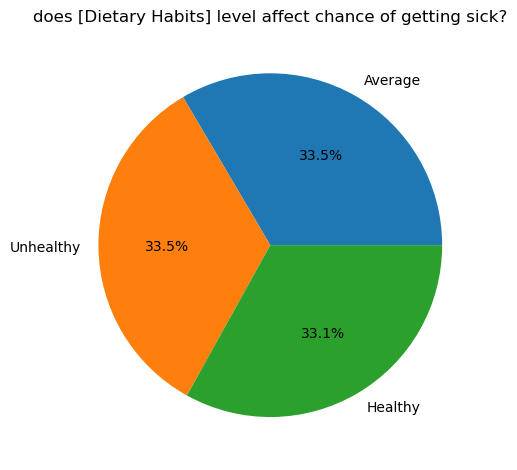

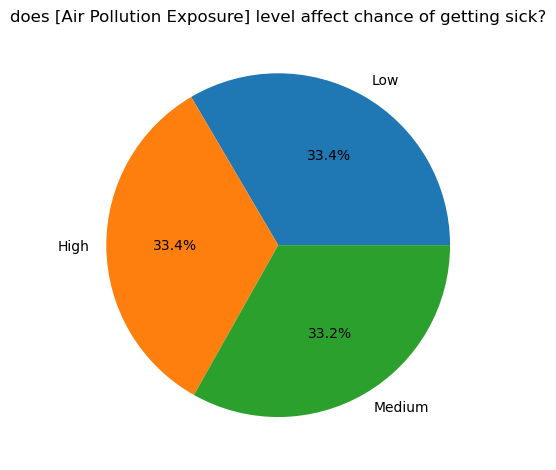

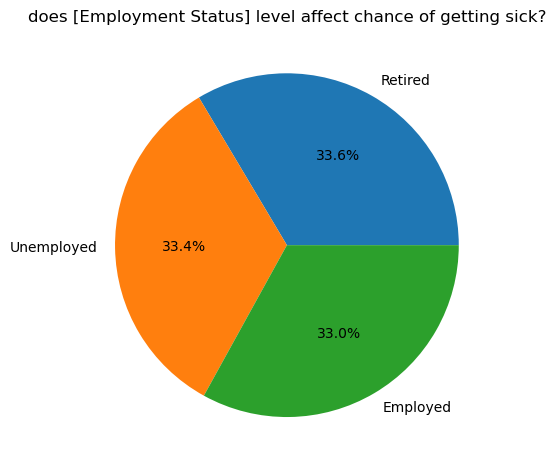

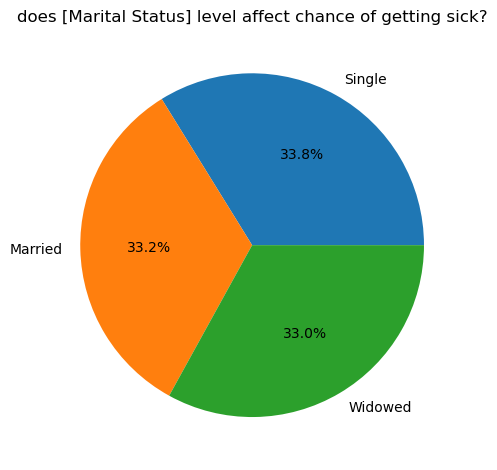

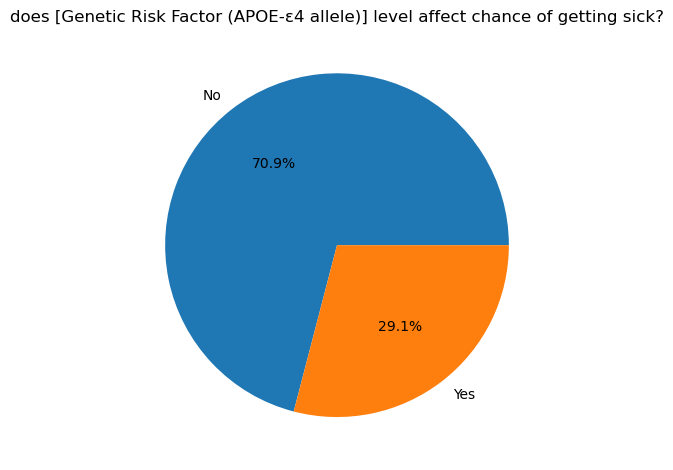

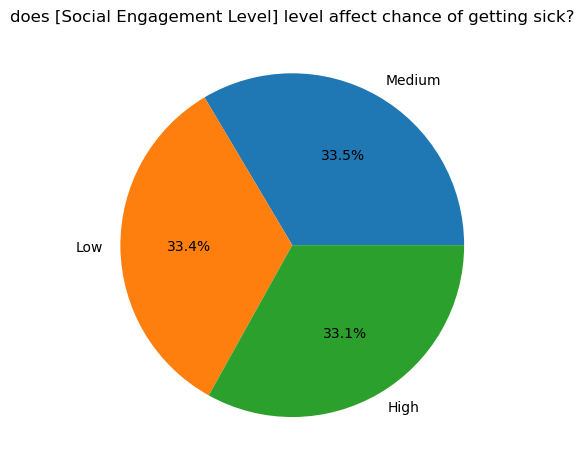

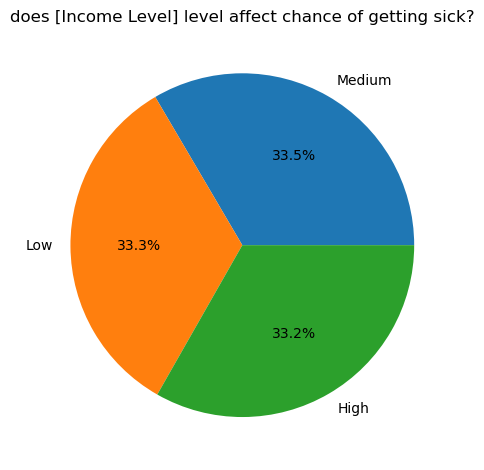

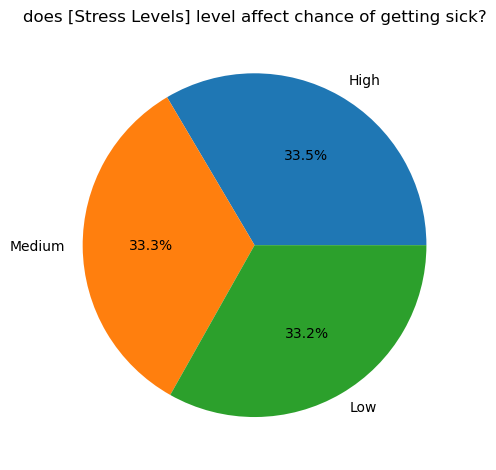

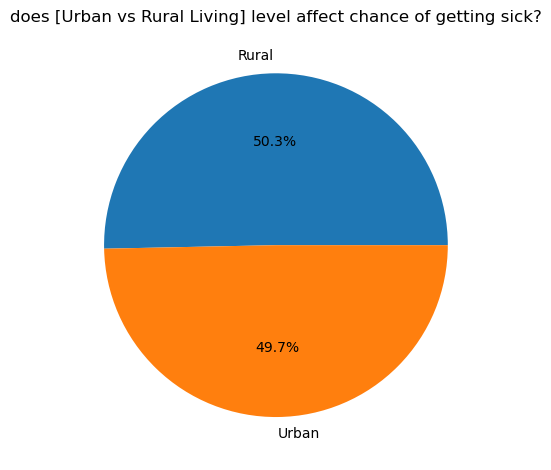

In [5]:
atributes = alzheimers.select_dtypes(include="object").columns.tolist()
atributes.remove("Alzheimer’s Diagnosis")
atributes.remove("Country")
for atribute in atributes:
     division = alzheimers[atribute][alzheimers["Alzheimer’s Diagnosis"]=="Yes"].value_counts()
     fig , ax = plt.subplots()
     ax.pie(division,labels=division.index,autopct="%1.1f%%")
     ax.title.set_text(f"does [{atribute}] level affect chance of getting sick?")
     save_fig(f"{atribute}_division")




array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education Level'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Cognitive Test Score'}>]], dtype=object)

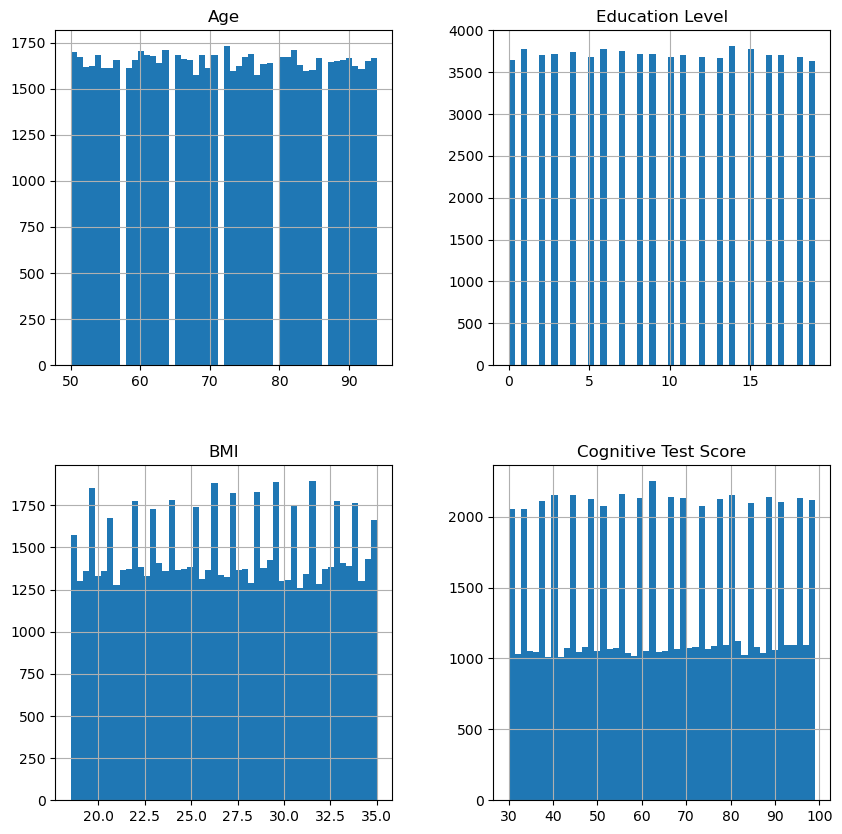

In [6]:
alzheimers.hist(bins=50,figsize=(10,10))

In [7]:
from sklearn.model_selection import train_test_split, cross_val_predict

train_set,test_set = train_test_split(alzheimers,test_size=0.25)
alzheimers = train_set.drop("Alzheimer’s Diagnosis",axis=1)
alzheimers_labels = train_set["Alzheimer’s Diagnosis"].copy()


In [8]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

object_col_sel = make_column_selector(dtype_include=object)
columns = object_col_sel(alzheimers)
columns_Y_N = [column for column in columns if alzheimers[column].nunique() == 2]
columns_Y_N

['Gender',
 'Diabetes',
 'Hypertension',
 'Cholesterol Level',
 'Family History of Alzheimer’s',
 'Genetic Risk Factor (APOE-ε4 allele)',
 'Urban vs Rural Living']

In [9]:
try:
    for column in columns_Y_N:
        columns.remove(column)
    columns.remove("Country")
except ValueError:
    print("already removed")

In [10]:
for column in columns:
    print(f"{column} : {alzheimers[column].unique()}")

Physical Activity Level : ['Medium' 'Low' 'High']
Smoking Status : ['Never' 'Current' 'Former']
Alcohol Consumption : ['Never' 'Occasionally' 'Regularly']
Depression Level : ['High' 'Low' 'Medium']
Sleep Quality : ['Good' 'Poor' 'Average']
Dietary Habits : ['Average' 'Unhealthy' 'Healthy']
Air Pollution Exposure : ['High' 'Medium' 'Low']
Employment Status : ['Employed' 'Unemployed' 'Retired']
Marital Status : ['Married' 'Widowed' 'Single']
Social Engagement Level : ['Low' 'Medium' 'High']
Income Level : ['Low' 'High' 'Medium']
Stress Levels : ['Low' 'Medium' 'High']


In [11]:

columns_LMH = [column for column in columns if "Medium" in alzheimers[column].unique()]
columns_LMH_categories = ["Low", "Medium", "High"]
columns_LMH


['Physical Activity Level',
 'Depression Level',
 'Air Pollution Exposure',
 'Social Engagement Level',
 'Income Level',
 'Stress Levels']

In [12]:
from sklearn.preprocessing import OrdinalEncoder
one_hot_encoder = OneHotEncoder(handle_unknown="ignore")
data_processor = ColumnTransformer([
    ("stand",StandardScaler(),make_column_selector(dtype_include=["int64","float64"])),
    ("binary_cat",OneHotEncoder(handle_unknown="ignore",drop="first"),columns_Y_N),
    ("cat",OneHotEncoder(handle_unknown="ignore"),["Country"]),
    ("LMH",OrdinalEncoder(categories=[columns_LMH_categories]*len(columns_LMH)),columns_LMH),
],
remainder=one_hot_encoder)
data_processor

ColumnTransformer(remainder=OneHotEncoder(handle_unknown='ignore'),
                  transformers=[('stand', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002132A2EFB30>),
                                ('binary_cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['Gender', 'Diabetes', 'Hypertension',
                                  'Cholesterol Level',
                                  'Family History of Alzheimer’s',
                                  'Geneti...
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Country']),
                                ('LMH',
                                 OrdinalEncoder(categories=[['Low', 'Medium',
                                                             'High'],
                                                            ['Low', 'Medium',
                                                             'High'],
                                                            ['Low', 'Medium',
                                                             'High'],
                                                            ['Low', 'Medium',
                                                             'High'],
                                                            ['Low', 'Medium',
                                                             'High'],
                                                            ['Low', 'Medium',
                                                             'High']]),
                                 ['Physical Activity Level', 'Depression Level',
                                  'Air Pollution Exposure',
                                  'Social Engagement Level', 'Income Level',
                                  'Stress Levels'])])

In [13]:
alzheimers_labels.iloc[:5].values

array(['No', 'Yes', 'No', 'Yes', 'No'], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder
laber_encoder = LabelEncoder()
alzheimers_labels = laber_encoder.fit_transform(alzheimers_labels)
X_test = test_set.drop("Alzheimer’s Diagnosis",axis=1)
Y_test = test_set["Alzheimer’s Diagnosis"].copy()
Y_test = laber_encoder.fit_transform(Y_test)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
full_pipline = Pipeline([
    ("data_processor", data_processor),
    ("random_forest",RandomForestClassifier(random_state=42)),
])



In [16]:
random_for = full_pipline.fit(alzheimers,alzheimers_labels)
random_for_train_score = random_for.score(alzheimers,alzheimers_labels)
random_for_test_score = random_for.score(X_test,Y_test)


In [17]:
print(random_for_train_score)
print(random_for_test_score)



1.0
0.7202627752948145


In [18]:
data_processor.fit_transform(alzheimers)
len(data_processor.get_feature_names_out())

55

In [20]:
from sklearn.model_selection import RandomizedSearchCV

param_distrib = {
    "random_forest__n_estimators": randint(low=40 , high=200),
    "random_forest__max_depth": randint(low=3 , high=20),
    "random_forest__max_features": randint(low=10 , high=len(data_processor.get_feature_names_out()))
}
rnd_search =RandomizedSearchCV(
    full_pipline,
    param_distributions=param_distrib,
    n_iter=10,
    cv=3,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1
)
rnd_search.fit(alzheimers,alzheimers_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('data_processor',
                                              ColumnTransformer(remainder=OneHotEncoder(handle_unknown='ignore'),
                                                                transformers=[('stand',
                                                                               StandardScaler(),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x000002132A2EFB30>),
                                                                              ('binary_cat',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['Gender',
                                                                                'Diabetes',
                                                                                'H...
                   param_distributions={'random_forest__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021329338620>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000213293392B0>,
                                        'random_forest__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021329338B90>},
                   random_state=42, scoring='accuracy')

In [22]:
final_model = rnd_search.best_estimator_
final_model.fit(alzheimers,alzheimers_labels)
random_forest_train_score = final_model.score(alzheimers,alzheimers_labels)
random_forest_test_score = final_model.score(X_test,Y_test)

In [23]:
print(random_forest_train_score)
print(random_forest_test_score)


0.7295555715106261
0.7245705670130849


In [24]:
from sklearn.feature_selection import SelectFromModel
full_pipline2 = Pipeline([
    ("data_processor", data_processor),
    ("selector",SelectFromModel(RandomForestClassifier(random_state=42))),
    ("random_forest",RandomForestClassifier(random_state=42,
                                            n_estimators=rnd_search.best_params_["random_forest__n_estimators"],
                                            max_depth=rnd_search.best_params_["random_forest__max_depth"],
                                            max_features=rnd_search.best_params_["random_forest__max_features"],)),
])

In [26]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, f1_score
y_pred = cross_val_predict(full_pipline2,alzheimers,alzheimers_labels,cv=3,n_jobs=-1)
print(accuracy_score(alzheimers_labels,y_pred))
print(recall_score(alzheimers_labels,y_pred))
print(f1_score(alzheimers_labels,y_pred))


0.726988799540494
0.724613710554951
0.6864305446748856


In [27]:
y_pred = cross_val_predict(full_pipline2,X_test,Y_test,cv=3,n_jobs=-1)
print(accuracy_score(Y_test,y_pred))
print(recall_score(Y_test,y_pred))
print(f1_score(Y_test,y_pred))


0.7231166873081687
0.7253812354613596
0.6858504398826979
